$$\newcommand{\var}{\text{Var}}$$
$$\newcommand{\cov}{\text{Cov}}$$
$$\newcommand{\E}{\mathbb{E}}$$
$$\usepackage{multicol}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

I was quite confused why would scale volaility by $sqrt(12)$ and not by $12$ when doing homework 1. Below is some work and I have 3 conclusions
1. We should use $12$ for volaility of **annualized monthly returns** and $\sqrt{12}$ for volaility of **annual returns**
2. $\sqrt{12}* \text{Sample Vol of Monthly Returns}$ to be a bad estimate for volaility of annual returns
3. The annualization of monthly vol assumes returns are additive and not compounded, leading to a more innaccurate estimate of volaility of annual returns

# Monthly Returns
Consider the monthly return $r_{ij}$ in year i, in month j. Assume they are iid.

$$\begin{matrix}
    r_{1,1} & r_{1,2} & \cdots & r_{1,12} \\
    r_{2,1} & r_{2,2} & \cdots & r_{2,12} \\
    \vdots & \vdots & \ddots & \vdots \\
    r_{n,1} & r_{n,2} & \cdots & r_{n,12} \\
\end{matrix}$$

### Population Statistics
* mean: $\mu_r = \E[r]$
* variance: $\sigma_r^2= \var[r]$

### Sample Estimates
* mean: $\hat\mu_r = \frac{1}{12n} \sum_{i=1}^n \sum_{j=1}^{12} r_{ij}$
* variance: $\hat\sigma_r^2 = \frac{1}{12n-1} \sum_{i=1}^n \sum_{j=1}^{12} (r_{ij} - \hat\mu_r)^2$

## Annualized Monthly Returns
$R_{ij} = 12r_{ij}$

### Population Statistics
* mean $\mu_R = \E[R] = \E[12r] = 12\mu_r$
* variance $\sigma_R^2 = \var[R] = \var[12r] = 12\sigma_r^2$

### Sample Estimates
mean
$$\begin{aligned}
\hat\mu_R 
&= \frac{1}{12n} \sum_{i=1}^n \sum_{j=1}^{12} R_{ij} \\
&=  \frac{1}{12n} \sum_{i=1}^n \sum_{j=1}^{12} 12r_{ij} \\
&=  12\frac{1}{12n} \sum_{i=1}^n \sum_{j=1}^{12} r_{ij}  \\
&=  12\hat\mu_r  \\
\end{aligned}$$



Variance
$$\begin{aligned}
\hat\sigma_R^2
&= \frac{1}{12n-1} \sum_{i=1}^n \sum_{j=1}^{12} (R_{ij} - \mu_R)^2 \\
&= \frac{1}{12n-1} \sum_{i=1}^n \sum_{j=1}^{12} (12r_{ij} - 12\mu_r)^2 \\
&= \frac{1}{12n-1} \sum_{i=1}^n \sum_{j=1}^{12} 12^2(r_{ij} - \mu_r)^2 \\
&= 12^2\frac{1}{12n-1} \sum_{i=1}^n \sum_{j=1}^{12} (r_{ij} - \mu_r)^2 \\
&= 12^2\hat\sigma_r^2
\end{aligned}$$

# Annual* returns
Assume returns are additive
$R'_i = \sum_{j=1}^{12} r_{ij}$

### Population Statistics
mean
$$\begin{aligned}
\mu_R
&= \E[R] \\
&= \E\left[\sum_{j=1}^{12} r_{j}\right] \\
&= \sum_{j=1}^{12} \E[r_{j}] \\
&= 12\mu_r \\
\end{aligned}$$



variance 
$$\begin{aligned}
\sigma_R^2
&= \var[R] \\
&= \var\left[\sum_{j=1}^{12} r_{j}\right] \\
&= \sum_{j=1}^{12}\sum_{k=1}^{12} \cov[r_j, r_k] \\
\end{aligned}$$
Note that returns are ind. so: $\cov[r_j, r_k] = \var[r]$ if $j=k$ and $0$ otherwise.
$$\begin{aligned}
\sigma_R^2
&= \sum_{j=1}^{12}\var[r] \\
&= 12\var[r] \\
\end{aligned}$$


### Sample Estimates
mean
$$\begin{aligned}
\hat\mu_{R'} 
&= \frac{1}{n} \sum_{i=1}^n R'_i \\
&= \frac{1}{n} \sum_{i=1}^n \sum_{j=1}^{12} r_{ij} \\
&= 12\frac{1}{12n} \sum_{i=1}^n \sum_{j=1}^{12} r_{ij} \\
&= 12\hat\mu_r \\
\end{aligned}$$


Variance
$$\begin{aligned}
\hat\sigma_{R'}^2
&= \frac{1}{n-1} \sum_{i=1}^n (R'_{ij} - 12\mu_r)^2 \\
&= \frac{1}{n-1} \sum_{i=1}^n \left(
        \left(\sum_{j=1}^{12} r_{ij}\right) - 12\mu_r
    \right)^2\\
&= \frac{1}{n-1} \sum_{i=1}^n \left(
        \sum_{j=1}^{12} r_{ij} - \mu_r
    \right)^2\\
\end{aligned}$$

Note that $\left(\sum_{j=1}^{12} r_{ij} - \mu_r \right)^2 = \sum_{j=1}^{12}\sum_{k=1}^{12} (r_{ij} - \mu_r)(r_{ik} - \mu_r)$


$$\begin{aligned}
\sigma_R'^2
&= \frac{1}{n-1} \sum_{i=1}^n \sum_{j=1}^{12}\sum_{k=1}^{12} (r_{ij} - \mu_r)(r_{ik} - \mu_r) \\
&= \frac{1}{n-1} \sum_{i=1}^n \sum_{j=1}^{12} (r_{ij} - \mu_r)^2 + \frac{1}{n-1} \sum_{i=1}^n \sum_{j \neq k} (r_{ij} - \mu_r)(r_{ik} - \mu_r)
\end{aligned}$$

Assuming independence
$$\begin{aligned}
\sigma_{R'}^2
&\approx \frac{1}{n-1} \sum_{i=1}^n \sum_{j=1}^{12} (r_{ij} - \mu_r)^2 + \frac{1}{n-1} \sum_{i=1}^n \sum_{j \neq k} (r_{ij} - \mu_r)(r_{ik} - \mu_r) \\ 
&\approx \frac{1}{n-1} \sum_{i=1}^n \sum_{j=1}^{12} (r_{ij} - \mu_r)^2 \\
&\approx \frac{12n-1}{n-1} \frac{1}{12n-1} \sum_{i=1}^n \sum_{j=1}^{12} (r_{ij} - \hat\mu_r)^2 \\
&\approx \frac{12n-1}{n-1} \sigma_r^2 \\
\end{aligned}$$

With large $n$ (meaning we have data over many years)
$$\begin{aligned}
\sigma_{R'}^2 &\approx 12\hat\sigma_r^2 \\
\end{aligned}$$

Just how many years should we have?

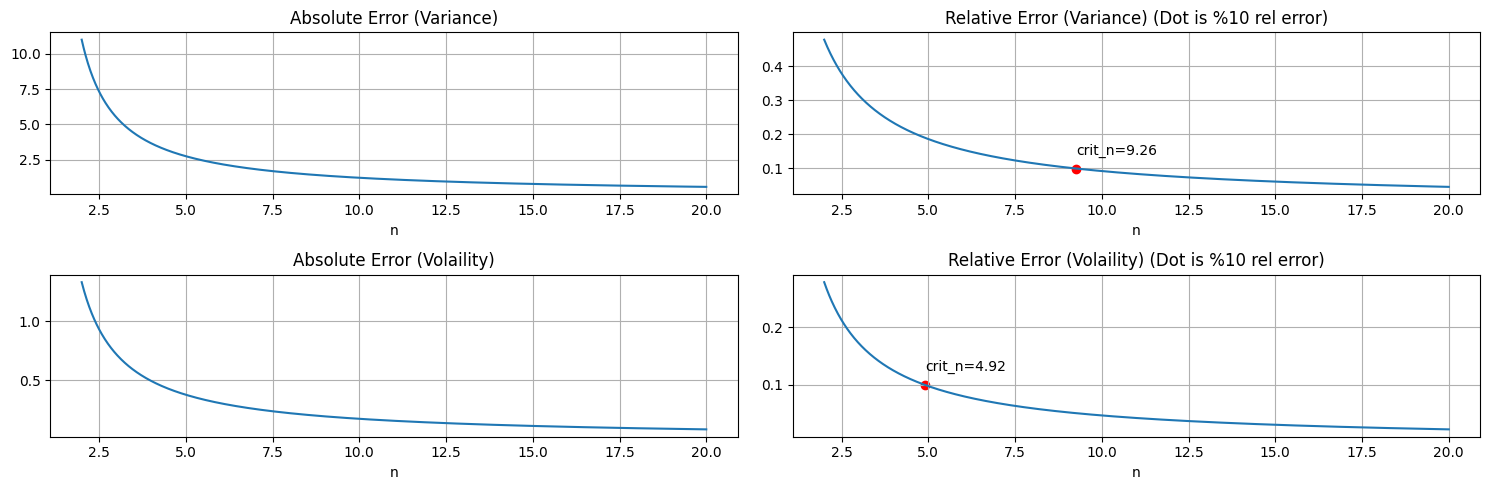

In [18]:
import numpy as np
import matplotlib.pyplot as plt

min_rel_eror = .1

def f_approx1(n, num_periods=12): 
    return num_periods*np.ones_like(n)
def f_true(n, num_periods=12): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        result = (num_periods-1/n)/(1-1/n)
    return result

n_vals = np.linspace(2, 20, 1000)
f_true_vals = f_true(n_vals)
f_approx_vals = f_approx1(n_vals)

plt.figure(figsize=(15,5))
plt.subplot(2, 2, 1)
plt.title("Absolute Error (Variance)")
abs_error = np.abs(f_true_vals - f_approx_vals)
plt.plot(n_vals, abs_error)
plt.xlabel('n')
plt.grid()

plt.subplot(2, 2, 2)
rel_error = abs_error / f_true_vals
plt.title(f"Relative Error (Variance) (Dot is %{100*min_rel_eror:.0f} rel error)")
# Find intersection with min_rel_eror
idx = np.where(rel_error < min_rel_eror)[0][0]
plt.scatter(n_vals[idx], rel_error[idx], color='red')
text = f'crit_n={n_vals[idx]:.2f}'
plt.annotate(text, (n_vals[idx], rel_error[idx]), textcoords="offset points", xytext=(0,10), ha='left')
#plot rel error
plt.plot(n_vals, rel_error)
plt.xlabel('n')
plt.grid()

# Volaility
f_true_vals = np.sqrt(f_true_vals)
f_approx_vals = np.sqrt(f_approx_vals)

plt.subplot(2, 2, 3)
plt.title("Absolute Error (Volaility)")
abs_error = np.abs(f_true_vals - f_approx_vals)
plt.plot(n_vals, abs_error)
plt.xlabel('n')
plt.grid()

plt.subplot(2, 2, 4)
rel_error = abs_error / f_true_vals
plt.title(f"Relative Error (Volaility) (Dot is %{100*min_rel_eror:.0f} rel error)")
# Find intersection with min_rel_eror
idx = np.where(rel_error < min_rel_eror)[0][0]
plt.scatter(n_vals[idx], rel_error[idx], color='red')
text = f'crit_n={n_vals[idx]:.2f}'
plt.annotate(text, (n_vals[idx], rel_error[idx]), textcoords="offset points", xytext=(0,10), ha='left')
#plot rel error
plt.plot(n_vals, rel_error)
plt.xlabel('n')
plt.grid()

plt.tight_layout()
plt.show()

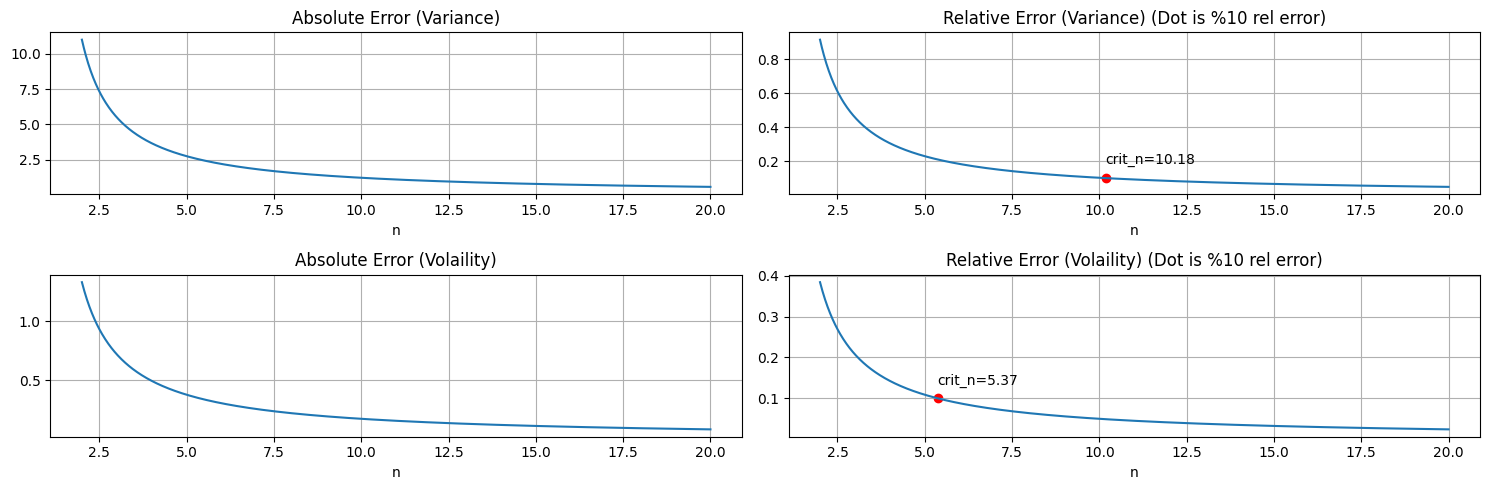

In [17]:
import numpy as np
import matplotlib.pyplot as plt

min_rel_eror = .1

def f_true(n, num_periods=12): return num_periods*np.ones_like(n)
def f_approx1(n, num_periods=12): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        result = (num_periods-1/n)/(1-1/n)
    return result
def f_approx2(n, num_periods=12): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        result = (num_periods-1/n)/(1-1/n)
    return result


n_vals = np.linspace(2, 20, 1000)
f_true_vals = f_true(n_vals)
f_approx_vals = f_approx1(n_vals)

plt.figure(figsize=(15,5))
plt.subplot(2, 2, 1)
plt.title("Absolute Error (Variance)")
abs_error = np.abs(f_true_vals - f_approx_vals)
plt.plot(n_vals, abs_error)
plt.xlabel('n')
plt.grid()

plt.subplot(2, 2, 2)
rel_error = abs_error / f_true_vals
plt.title(f"Relative Error (Variance) (Dot is %{100*min_rel_eror:.0f} rel error)")
# Find intersection with min_rel_eror
idx = np.where(rel_error < min_rel_eror)[0][0]
plt.scatter(n_vals[idx], rel_error[idx], color='red')
text = f'crit_n={n_vals[idx]:.2f}'
plt.annotate(text, (n_vals[idx], rel_error[idx]), textcoords="offset points", xytext=(0,10), ha='left')
#plot rel error
plt.plot(n_vals, rel_error)
plt.xlabel('n')
plt.grid()

# Volaility
f_true_vals = np.sqrt(f_true_vals)
f_approx_vals = np.sqrt(f_approx_vals)

plt.subplot(2, 2, 3)
plt.title("Absolute Error (Volaility)")
abs_error = np.abs(f_true_vals - f_approx_vals)
plt.plot(n_vals, abs_error)
plt.xlabel('n')
plt.grid()

plt.subplot(2, 2, 4)
rel_error = abs_error / f_true_vals
plt.title(f"Relative Error (Volaility) (Dot is %{100*min_rel_eror:.0f} rel error)")
# Find intersection with min_rel_eror
idx = np.where(rel_error < min_rel_eror)[0][0]
plt.scatter(n_vals[idx], rel_error[idx], color='red')
text = f'crit_n={n_vals[idx]:.2f}'
plt.annotate(text, (n_vals[idx], rel_error[idx]), textcoords="offset points", xytext=(0,10), ha='left')
#plot rel error
plt.plot(n_vals, rel_error)
plt.xlabel('n')
plt.grid()

plt.tight_layout()
plt.show()

So we really should not use $12\hat\sigma_r^2$ as an estimate for the volatility of annual return. Not to mention the fact that $\sum_{j=1}^{12} r_{ij}$ Shouldn't of been used in the first place

What if we had daily returns? or weekly

In [4]:
# todo double check below

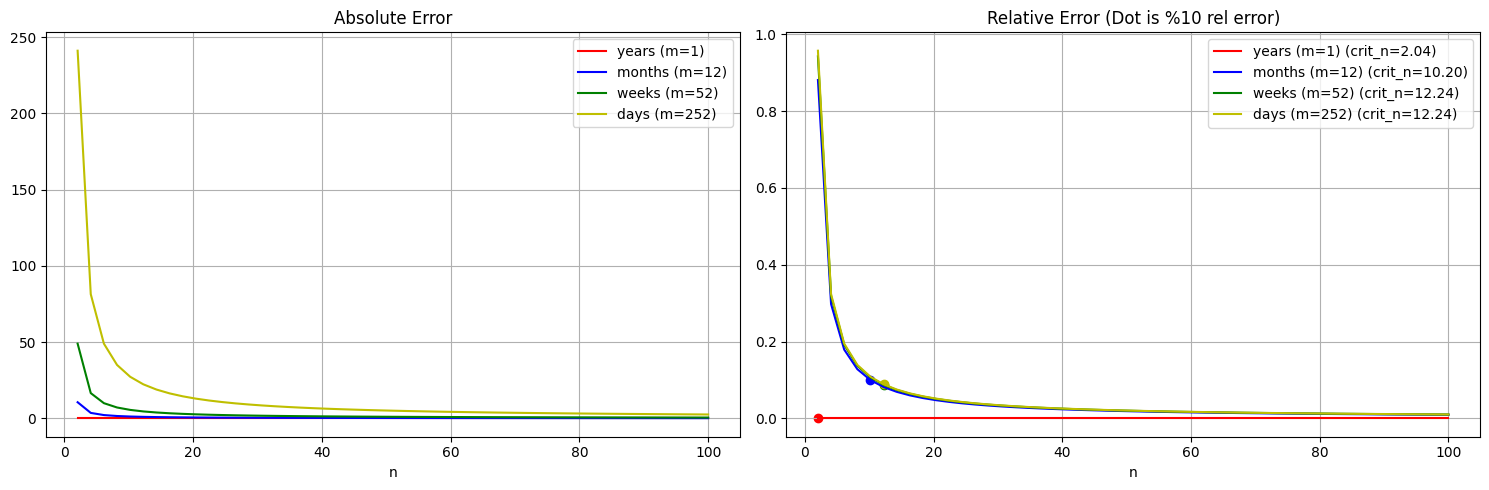

In [5]:
n_vals = np.linspace(2, 20, 1000)

plt.figure(figsize=(15,5))

peiods = {
    "years": (1, "r"),
    "months": (12, "b"),
    "weeks": (52, "g"),
    "days": (252, "y"), # Trading days
}

for k, val in peiods.items(): 
    period_name = k
    n_periods_per_year, color = val
    
    f_true_vals = f_true(n_vals, num_periods=n_periods_per_year)
    f_approx_vals = f_approx1(n_vals, num_periods=n_periods_per_year)
    
    plt.subplot(1, 2, 1)
    abs_error = np.abs(f_true_vals - f_approx_vals)
    plt.plot(n_vals, abs_error, label=f"{period_name} (m={n_periods_per_year})", color=color)

    plt.subplot(1, 2, 2)
    rel_error = abs_error / f_true_vals
    # Find intersection with min_rel_eror
    idx = np.where(rel_error < min_rel_eror)[0][0]
    crit_n = n_vals[idx]
    text = f'n={n_vals[idx]:.2f}'
    # Plot
    plt.plot(n_vals, rel_error, label=f"{period_name} (m={n_periods_per_year}) (crit_n={crit_n:.2f})", color=color)
    plt.scatter(crit_n, rel_error[idx], color=color)
    



plt.subplot(1, 2, 1)
plt.title("Absolute Error")
plt.legend()
plt.xlabel('n')
plt.grid()

plt.subplot(1, 2, 2)
plt.title(f"Relative Error (Dot is %{100*min_rel_eror:.0f} rel error)")
plt.legend()
plt.xlabel('n')
plt.grid()

plt.tight_layout()
plt.show()

Makes sense because we would have more sample points per year

In [6]:
# todo double check below

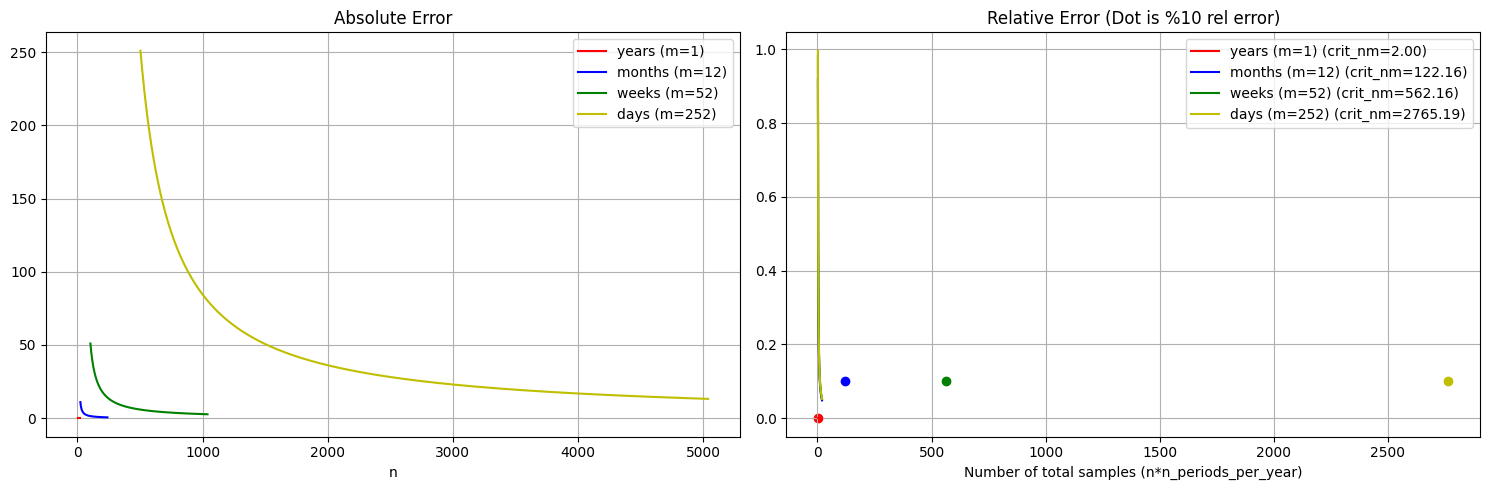

In [11]:
n_vals = np.linspace(2, 20, 1000)

plt.figure(figsize=(15,5))

peiods = {
    "years": (1, "r"),
    "months": (12, "b"),
    "weeks": (52, "g"),
    "days": (252, "y"), # Trading days
}

for k, val in peiods.items(): 
    period_name = k
    n_periods_per_year, color = val
    
    f_true_vals = f_true(n_vals, num_periods=n_periods_per_year)
    f_approx_vals = f_approx1(n_vals, num_periods=n_periods_per_year)
    
    plt.subplot(1, 2, 1)
    abs_error = np.abs(f_true_vals - f_approx_vals)
    plt.plot(n_vals *n_periods_per_year, abs_error, label=f"{period_name} (m={n_periods_per_year})", color=color)

    plt.subplot(1, 2, 2)
    rel_error = abs_error / f_true_vals
    # Find intersection with min_rel_eror
    idx = np.where(rel_error < min_rel_eror)[0][0]
    crit_nm = n_vals[idx] * n_periods_per_year
    # Plot
    plt.plot(n_vals, rel_error, label=f"{period_name} (m={n_periods_per_year}) (crit_nm={crit_nm:.2f})", color=color)
    plt.scatter(crit_nm, rel_error[idx], color=color)


plt.subplot(1, 2, 1)
plt.title("Absolute Error")
plt.legend()
plt.xlabel('n')
plt.grid()

plt.subplot(1, 2, 2)
plt.title(f"Relative Error (Dot is %{100*min_rel_eror:.0f} rel error)")
plt.legend()
plt.xlabel('Number of total samples (n*n_periods_per_year)')
plt.grid()

plt.tight_layout()
plt.show()

# Annual* returns (Geometric)
$\tilde{R}_i = -1+\prod_{j=1}^{12} 1+r_{ij}$

## Population Statistics
mean
$$\begin{aligned}
\mu_{\tilde{R}}
&= \E[\tilde{R}] \\
&= \E\left[-1+\prod_{j=1}^{12} (1+r_{j})\right] \\
&= -1+\prod_{j=1}^{12} \E[1+r_{j}] \\
&= -1+\prod_{j=1}^{12} (1+\E[r]) \\
&= (1+\mu_r)^{12}-1 \\
\end{aligned}$$

variance
$$\begin{aligned}
\sigma_{\tilde{R}}^2
&= \var[\tilde{R}] \\
&= \var\left[-1+\prod_{j=1}^{12} 1+r_{j}\right] \\
&= \var\left[\prod_{j=1}^{12} 1+r_{j}\right] \\
&= \var\left[\prod_{j=1}^{12} 1+r_{j}\right] \\
\end{aligned}$$


Refer to appendex 1.2
$$\begin{aligned}
\sigma_{\tilde{R}}^2
&= \prod_{i=1}^n E[(1+r_{j})^2] - \prod_{i=1}^n E[1+r_{j}]^2\\
&= \prod_{i=1}^n E[1+2r_{j}+r_{j}^2] - \prod_{i=1}^n \left(1+E[r_{j}]\right)^2\\
&= \prod_{i=1}^n \left(1+2E[r_{j}]+E[r_{j}^2]\right) - \prod_{i=1}^n \left(1+2E[r_{j}]+E[r_{j}]^2\right)\\
&= \prod_{i=1}^n \left(1+2E[r]+E[r^2]\right) - \prod_{i=1}^n \left(1+2E[r]+E[r]^2\right)\\
\end{aligned}$$

 <!-- todo approximate above? also maybe find sample estimates? -->

# Appendix A.1
$$\var\left[\prod_{i=1}^n X_i\right] = E\left[\left(\prod_{i=1}^n X_i\right)^2\right] - \left(E\left[\prod_{i=1}^n X_i\right]\right)^2$$

If the variables are independent, we have:

$$\var\left[\prod_{i=1}^n X_i\right] = \prod_{i=1}^n E[X_i^2] -\prod_{i=1}^n E[X_i]^2$$